### The Notebook is structed as follows:

### 1. Importing Libraries, .json files and .csv files

### 2. Wrangling and Cleaning the Data

### 3. Creating the Chlorpleth Map

# 1. Importing Libraries, .json files and .csv files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for North America

country_geo = r'C:/Users/mmoss/07-02-2022 NHL Data Analysis/02 Data/Original/us-states.json'

In [4]:
path = 'C:/Users/mmoss/07-02-2022 NHL Data Analysis'

In [5]:
# Testing it
path

'C:/Users/mmoss/07-02-2022 NHL Data Analysis'

In [6]:
# Import the games data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original', 'game.csv'))

In [7]:
# Calling the head
df.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


# 2. Wrangling and Cleaning the Data

Need to make a subset of the data with only the type, home_goals,venue and state name

In [8]:
# Calling only those columns. State name will have to be added based on the venue column.
df[['type', 'home_goals', 'venue']]

,type,home_goals,venue
0,R,7,United Center
1,R,3,KeyBank Center
2,R,1,MTS Centre
3,R,2,PNC Arena
4,R,2,Honda Center
...,...,...,...
26300,P,1,TD Garden
26301,P,1,Enterprise Center
26302,P,1,Enterprise Center
26303,P,1,TD Garden


In [9]:
# Setting it to a variable
df_map = df[['type', 'home_goals', 'venue']]

In [10]:
# Calling it
df_map

,type,home_goals,venue
0,R,7,United Center
1,R,3,KeyBank Center
2,R,1,MTS Centre
3,R,2,PNC Arena
4,R,2,Honda Center
...,...,...,...
26300,P,1,TD Garden
26301,P,1,Enterprise Center
26302,P,1,Enterprise Center
26303,P,1,TD Garden


In [11]:
# Need to create another column for province or state. To do this I will create a new column based on the 'venues' column
# To do this I'll need a list of all unique values in the venue column
df_map.venue.unique()


array(['United Center', 'KeyBank Center', 'MTS Centre', 'PNC Arena',
       'Honda Center', 'Centre Bell', 'STAPLES Center', 'Pepsi Center',
       'CONSOL Energy Center', 'American Airlines Center',
       'Gila River Arena', 'Wells Fargo Center', 'Prudential Center',
       'Scotiabank Saddledome', 'Xcel Energy Center', 'Barclays Center',
       'Bell MTS Place', 'SAP Center at San Jose', 'Bridgestone Arena',
       'Amalie Arena', 'Capital One Arena', 'Rogers Arena',
       'Air Canada Centre', 'Nationwide Arena', 'BB&T Center',
       'Verizon Center', 'Joe Louis Arena', 'TD Garden',
       'First Niagara Center', 'Madison Square Garden',
       'Scottrade Center', 'PPG Paints Arena', 'T-Mobile Arena',
       'Little Caesars Arena', 'Rexall Place', 'Rogers Place',
       'Canadian Tire Centre', 'Ericsson Globe', 'TCF Bank Stadium',
       'BMO Field', 'Gillette Stadium', 'Busch Stadium',
       'Investors Group Field', 'Heinz Field', 'Citi Field',
       'Lansdowne Park', 'Navy-Mar

#### Creating the result to apply to the new column

In [12]:
result = []

for value in df_map["venue"]:
  if value == 'KeyBank Center':
    result.append("New York")
  elif value == 'PNC Arena':
    result.append("North Carolina")
  elif value == 'Honda Center':
    result.append("California")
  elif value == 'STAPLES Center':
    result.append("California")
  elif value == 'Pepsi Center':
    result.append("Colorado")
  elif value == 'CONSOL Energy Center':
    result.append("Pennsylvania")
  elif value == 'American Airlines Center':
    result.append("Texas")
  elif value == 'Gila River Arena':
    result.append("Arizona")
  elif value == 'Wells Fargo Center':
    result.append("Philadelphia")
  elif value == 'Prudential Center':
    result.append("New Jersey")
  elif value == 'Xcel Energy Center':
    result.append("Minnesota")
  elif value == 'Barclays Center':
    result.append("New York")
  elif value == 'SAP Center at San Jose':
    result.append("California")
  elif value == 'Bridgestone Arena':
    result.append("Tennessee")
  elif value == 'Amalie Arena':
    result.append("Florida")
  elif value == 'Capital One Arena':
    result.append("District of Columbia")
  elif value == 'Rogers Arena':
    result.append("British Columbia")
  elif value == 'Nationwide Arena':
    result.append("Ohio")
  elif value == 'BB&T Center':
    result.append("Florida")
  elif value == 'Verizon Center':
    result.append("District of Columbia")
  elif value == 'Joe Louis Arena':
    result.append("Michigan")
  elif value == 'TD Garden':
    result.append("Massachusetts")
  elif value == 'First Niagara Center':
    result.append("New York")
  elif value == 'Madison Square Garden':
    result.append("New York")
  elif value == 'Scottrade Center':
    result.append("Missouri")
  elif value == 'PPG Paints Arena':
    result.append("Pennsylvania")
  elif value == 'T-Mobile Arena':
    result.append("Nevada")
  elif value == 'Little Caesars Arena':
    result.append("Michigan")
  elif value == 'TCF Bank Stadium':
    result.append("Minnesota")
  elif value == 'Gillette Stadium':
    result.append("Massachusetts")
  elif value == 'Busch Stadium':
    result.append("Missouri")
  elif value == 'Heinz Field':
    result.append("Pennsylvania")
  elif value == 'Citi Field':
    result.append("New York")
  elif value == 'Navy-Marine Corps Memorial Stadium':
    result.append("Maryland")
  elif value == 'Coors Field':
    result.append("Colorado")
  elif value == 'Nassau Coliseum':
    result.append("New York")
  elif value == 'Nationals Park':
    result.append("District of Columbia")
  elif value == "Levi's Stadium":
    result.append("California")
  elif value == 'Jobing.com Arena':
    result.append("Arizona")
  elif value == 'Tampa Bay Times Forum':
    result.append("Florida")
  elif value == 'HP Pavilion at San Jose':
    result.append("California")
  elif value == 'Staples Center':
    result.append("California")
  elif value == 'Dodger Stadium':
    result.append("California")
  elif value == 'BC Place':
    result.append("British Columbia")
  elif value == 'The Big House':
    result.append("Michigan")
  elif value == 'Yankee Stadium':
    result.append("New York")
  elif value == 'Soldier Field':
    result.append("Illinois")
  elif value == 'HSBC Arena':
    result.append("New York")
  elif value == 'RBC Center':
    result.append("Halifax")
  elif value == 'St. Pete Times Forum':
    result.append("Florida")
  elif value == 'BankAtlantic Center':
    result.append("Florida")
  elif value == 'Philips Arena':
    result.append("Georgia")
  elif value == 'McMahon Stadium':
    result.append("Alberta")
  elif value == 'Citizens Bank Park':
    result.append("Pennsylvania")
  elif value == 'Wachovia Center':
    result.append("Philadelphia")
  elif value == 'Pengrowth Saddledome':
    result.append("Alberta")
  elif value == 'General Motors Place':
    result.append("British Columbia")
  elif value == 'Mellon Arena':
    result.append("Pennsylvania")
  elif value == 'Sommet Center':
    result.append("Tennessee")
  elif value == 'Fenway Park':
    result.append("Massachusetts")
  elif value == 'TD Banknorth Garden':
    result.append("Massachusetts")
  elif value == 'Wrigley Field':
    result.append("Illinois")
  elif value == 'Ralph Wilson Stadium':
    result.append("New York")
  elif value == 'Continental Airlines Arena':
    result.append("New Jersey")
  elif value == 'Gaylord Entertainment Center':
    result.append("Tennessee")
  elif value == 'Nashville Arena':
    result.append("Tennessee")
  elif value == 'Glendale Arena':
    result.append("Arizona")
  elif value == 'Skyreach Centre':
    result.append("Alberta")
  elif value == 'America West Arena':
    result.append("Arizona")
  elif value == 'MCI Center':
    result.append("District of Columbia")
  elif value == 'Arrowhead Pond':
    result.append("California")
  elif value == 'FleetCenter':
    result.append("Massachusetts")
  elif value == 'Office Depot Center':
    result.append("Florida")
  elif value == 'First Union Center':
    result.append("Pennsylvania")
  elif value == 'Savvis Center':
    result.append("Missouri")
  elif value == 'San Jose Arena':
    result.append("California")
  elif value == 'Reunion Arena':
    result.append("Texas")
  elif value == 'National Car Rental Center':
    result.append("Florida")
  elif value == 'Entertainment and Sports Arena':
    result.append("District of Columbia")
  elif value == 'Compaq Center at San Jose':
    result.append("California")
  elif value == 'Verizon Center                                                  ':
    result.append("District of Columbia")
  elif value == 'Bridgestone Arena                                               ':
    result.append("Tennessee")
  elif value == 'Enterprise Center':
    result.append("Missouri")
  elif value == 'NYCB Live/Nassau Coliseum':
    result.append("New York")
  elif value == 'Cotton Bowl Stadium':
    result.append("Texas")
  elif value == 'Falcon Stadium':
    result.append("Colorado")
  elif value == 'Notre Dame Stadium':
    result.append("Indiana")
  elif value == 'Lincoln Financial Field':
    result.append("Pennsylvania")
  else:
    result.append("Not in the United States")

In [13]:
result

['Not in the United States',
 'New York',
 'Not in the United States',
 'North Carolina',
 'California',
 'Not in the United States',
 'California',
 'California',
 'Colorado',
 'Pennsylvania',
 'Texas',
 'California',
 'Arizona',
 'Arizona',
 'Philadelphia',
 'New Jersey',
 'Not in the United States',
 'Texas',
 'North Carolina',
 'New Jersey',
 'Minnesota',
 'New York',
 'Not in the United States',
 'California',
 'California',
 'Tennessee',
 'Not in the United States',
 'Not in the United States',
 'Florida',
 'District of Columbia',
 'California',
 'Not in the United States',
 'Not in the United States',
 'Not in the United States',
 'Texas',
 'California',
 'California',
 'New York',
 'California',
 'Colorado',
 'British Columbia',
 'California',
 'Not in the United States',
 'District of Columbia',
 'California',
 'North Carolina',
 'Ohio',
 'Tennessee',
 'Florida',
 'Not in the United States',
 'District of Columbia',
 'Not in the United States',
 'Philadelphia',
 'Not in the Un

In [14]:
# Creating a new column in the df_map dataframe
df_map['state'] = result

C:\Users\mmoss\AppData\Local\Temp/ipykernel_15200/4133436402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['state'] = result


In [15]:
# Testing it
df_map

,type,home_goals,venue,state
0,R,7,United Center,Not in the United States
1,R,3,KeyBank Center,New York
2,R,1,MTS Centre,Not in the United States
3,R,2,PNC Arena,North Carolina
4,R,2,Honda Center,California
...,...,...,...,...
26300,P,1,TD Garden,Massachusetts
26301,P,1,Enterprise Center,Missouri
26302,P,1,Enterprise Center,Missouri
26303,P,1,TD Garden,Massachusetts


In [16]:
# Drop the rows that have "Not in the US"
df_map[df_map["state"].str.contains("Not in the United States")==False]

,type,home_goals,venue,state
1,R,3,KeyBank Center,New York
3,R,2,PNC Arena,North Carolina
4,R,2,Honda Center,California
6,R,2,STAPLES Center,California
7,R,4,Honda Center,California
...,...,...,...,...
26300,P,1,TD Garden,Massachusetts
26301,P,1,Enterprise Center,Missouri
26302,P,1,Enterprise Center,Missouri
26303,P,1,TD Garden,Massachusetts


In [17]:
# Setting it to a variable
df_map = df_map[df_map["state"].str.contains("Not in the United States")==False]

In [18]:
# Testing it
df_map

,type,home_goals,venue,state
1,R,3,KeyBank Center,New York
3,R,2,PNC Arena,North Carolina
4,R,2,Honda Center,California
6,R,2,STAPLES Center,California
7,R,4,Honda Center,California
...,...,...,...,...
26300,P,1,TD Garden,Massachusetts
26301,P,1,Enterprise Center,Missouri
26302,P,1,Enterprise Center,Missouri
26303,P,1,TD Garden,Massachusetts


Success!

### Conducting consistency checks

In [19]:
# Check for missing values

df_map.isnull().sum()

type          0
home_goals    0
venue         0
state         0
dtype: int64

No missing values!

### Checking for duplicates

In [20]:
dups = df_map.duplicated()

In [21]:
dups.shape #no duplicates

(20878,)

### Checking for extreme values

<AxesSubplot:xlabel='home_goals', ylabel='Count'>

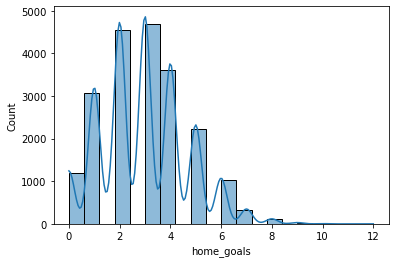

In [22]:
sns.histplot(df_map['home_goals'], bins=20, kde = True) # shows extreme values for 'home_goals'

In [23]:
# Check how many extreme values

df_map[df_map['home_goals'] >10]

,type,home_goals,venue,state
14310,R,12,MCI Center,District of Columbia


In [24]:
# Clean extreme values
df_map = df_map[df_map['home_goals'] < 10]

#Picked 10 because more than 10 goals in a game seems excessive

In [25]:
# Seeing the data types
df_map.dtypes

type          object
home_goals     int64
venue         object
state         object
dtype: object

In [26]:
# Create a data frame with just the states and the home_goals for what we want plotted

data_to_plot = df_map[['state','home_goals']]
data_to_plot.head()

,state,home_goals
1,New York,3
3,North Carolina,2
4,California,2
6,California,2
7,California,4


In [27]:
# Aggregating the data frame on the state column
data_to_plot.groupby('state').agg({'home_goals': ['sum']})

,home_goals
,sum
state,
Alberta,1341
Arizona,2338
British Columbia,2576
California,7751
Colorado,2569
District of Columbia,2981
Florida,4951
Georgia,1165


In [28]:
data_to_plot = data_to_plot.groupby('state').agg({'home_goals': ['sum']})

In [29]:
data_to_plot

,home_goals
,sum
state,
Alberta,1341
Arizona,2338
British Columbia,2576
California,7751
Colorado,2569
District of Columbia,2981
Florida,4951
Georgia,1165


In [30]:
# Exporting the finished dataframe to remove home_goals and sum
# Exporting data_to_plot
data_to_plot.to_csv(os.path.join(path, '02 Data','Prepared', 'map.csv'))

In [33]:
# Import the map data after the changes

df_map = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'map.csv'))

# 3. Creating the Chlorpleth Map

In [34]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_map,
    columns = ['state', 'home_goals'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Home Goals").add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
map.save('plot_data.html')

New York and California have the highest number of goals scored. These should be recommended to users of NHL Tips. 